In [108]:
# Imports
import pandas as pd       
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [109]:
suic = pd.read_csv('../Mental-Health-Risk-Assessment/Data/cleaned_suicidewatch.csv')

In [110]:
suic.head()

,Unnamed: 0,subreddit,author,domain,timecreated,Post
0,0,suicidewatch,_AbstractInsanity,self.SuicideWatch,2021-12-12 09:21:26,attempted yesterday i had an exit yesterday an...
1,1,suicidewatch,maxortheblade,self.SuicideWatch,2021-12-12 09:13:40,my bf of years just tried to hang himself las...
2,2,suicidewatch,depressed-wowie,self.SuicideWatch,2021-12-12 09:12:27,he gave up because of me we have shared many ...
3,3,suicidewatch,Kaitlyn-Wofford,self.SuicideWatch,2021-12-12 09:08:15,running out of options does anyone have any co...
4,4,suicidewatch,irrationalthinkerx0,self.SuicideWatch,2021-12-12 09:01:32,my life is shit i feel like shit i hate mysel...


In [111]:
suic.drop(columns = ['Unnamed: 0'], inplace = True)

In [112]:
suic.head()

,subreddit,author,domain,timecreated,Post
0,suicidewatch,_AbstractInsanity,self.SuicideWatch,2021-12-12 09:21:26,attempted yesterday i had an exit yesterday an...
1,suicidewatch,maxortheblade,self.SuicideWatch,2021-12-12 09:13:40,my bf of years just tried to hang himself las...
2,suicidewatch,depressed-wowie,self.SuicideWatch,2021-12-12 09:12:27,he gave up because of me we have shared many ...
3,suicidewatch,Kaitlyn-Wofford,self.SuicideWatch,2021-12-12 09:08:15,running out of options does anyone have any co...
4,suicidewatch,irrationalthinkerx0,self.SuicideWatch,2021-12-12 09:01:32,my life is shit i feel like shit i hate mysel...


In [113]:
suic['domain'].value_counts()

self.SuicideWatch    13915
Name: domain, dtype: int64

In [114]:
suic.drop(columns = ['domain'], inplace = True)

In [115]:
suic.head()

,subreddit,author,timecreated,Post
0,suicidewatch,_AbstractInsanity,2021-12-12 09:21:26,attempted yesterday i had an exit yesterday an...
1,suicidewatch,maxortheblade,2021-12-12 09:13:40,my bf of years just tried to hang himself las...
2,suicidewatch,depressed-wowie,2021-12-12 09:12:27,he gave up because of me we have shared many ...
3,suicidewatch,Kaitlyn-Wofford,2021-12-12 09:08:15,running out of options does anyone have any co...
4,suicidewatch,irrationalthinkerx0,2021-12-12 09:01:32,my life is shit i feel like shit i hate mysel...


## Preprocessing & EDA

### CountVectorizer

In [116]:
cvec = CountVectorizer()

In [117]:
X = suic['Post']
y = suic['subreddit']

In [118]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [119]:
Xcvec_train = cvec.fit_transform(X_train)

In [120]:
Xcvec_test = cvec.transform(X_test)

In [121]:
Xcvec_train.shape

(9323, 19405)

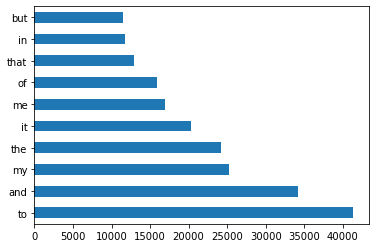

In [122]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
Xcv_train_df = pd.DataFrame(Xcvec_train.todense(), 
                          columns=cvec.get_feature_names_out())

# Xcv_train
Xcv_train_df.head()

# print(type(Xcv_train))
# print(Xcv_train[0])

# cvec.get_feature_names()[:10]

# plot top occuring words
Xcv_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [123]:
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'herself', 'next', 'too', 'neither', 'into', 'whereas', 'yet', 'every', 'everywhere', 'serious', 'forty', 'around', 'were', 'alone', 'hereafter', 'whenever', 'had', 'as', 'many', 'have', 'whoever', 'anyone', 'find', 'who', 'are', 'must', 'again', 'sometimes', 'why', 'go', 'ltd', 'will', 'made', 'someone', 'becoming', 'any', 'another', 'con', 'his', 'without', 'throughout', 'nor', 'through', 'eleven', 'indeed', 'after', 'besides', 'has', 'he', 'where', 'hereupon', 'keep', 'mostly', 'became', 'own', 'other', 'towards', 'whither', 'well', 'thence', 'these', 'while', 'your', 'always', 'from', 'very', 'sincere', 'therefore', 'hence', 'because', 'cant', 'do', 'of', 'somewhere', 'along', 'that', 'upon', 'toward', 'an', 'am', 'together', 'and', 'below', 'due', 'ever', 'above', 'namely', 'hundred', 'their', 'hers', 'then', 'per', 'yourself', 'whereby', 'via', 'no', 'most', 'whose', 'somehow', 'can', 'bill', 'de', 'anyhow', 'noone', 'also', 'amoungst', 'over', 'some', 'there', 'become

In [124]:
cvec2 = CountVectorizer(stop_words = 'english')

In [125]:
Xcvec_train = cvec2.fit_transform(X_train)
Xcvec_test = cvec2.transform(X_test)

In [126]:
Xcvec_train.shape

(9323, 19105)

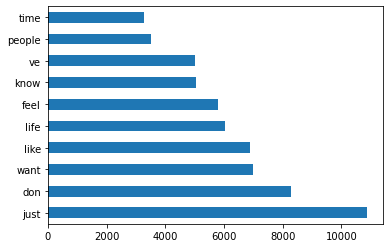

In [127]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
Xcv_train_df = pd.DataFrame(Xcvec_train.todense(), 
                          columns=cvec2.get_feature_names_out())

# Xcv_train
Xcv_train_df.head()

# print(type(Xcv_train))
# print(Xcv_train[0])

# cvec.get_feature_names()[:10]

# plot top occuring words
Xcv_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

've' seems like what would come after special characters; same with 'don' seems like it could be 'don't' ~ will try removing special characters through regex

In [128]:
s = suic['Post']

In [129]:
suic['Post1'] = suic['Post'].replace('\'`', '', regex = True)

In [130]:
suic['Post1']

0        attempted yesterday i had an exit yesterday an...
1        my bf of  years just tried to hang himself las...
2        he gave up because of me  we have shared many ...
3        running out of options does anyone have any co...
4        my life is shit i feel like shit  i hate mysel...
                               ...                        
13910    birthday bash wuhoo i m gonna be  soon and i k...
13911    i feel like everyone hates me i feel so unwant...
13912    im so desperate for love i let men treat me li...
13913    dumb girl that can t even take her own life i ...
13914    covid ruined my life i first tries to kill mys...
Name: Post1, Length: 13915, dtype: object

In [131]:
X = suic['Post1']
y = suic['subreddit']

In [132]:
X 

0        attempted yesterday i had an exit yesterday an...
1        my bf of  years just tried to hang himself las...
2        he gave up because of me  we have shared many ...
3        running out of options does anyone have any co...
4        my life is shit i feel like shit  i hate mysel...
                               ...                        
13910    birthday bash wuhoo i m gonna be  soon and i k...
13911    i feel like everyone hates me i feel so unwant...
13912    im so desperate for love i let men treat me li...
13913    dumb girl that can t even take her own life i ...
13914    covid ruined my life i first tries to kill mys...
Name: Post1, Length: 13915, dtype: object

In [133]:
suic.head()

,subreddit,author,timecreated,Post,Post1
0,suicidewatch,_AbstractInsanity,2021-12-12 09:21:26,attempted yesterday i had an exit yesterday an...,attempted yesterday i had an exit yesterday an...
1,suicidewatch,maxortheblade,2021-12-12 09:13:40,my bf of years just tried to hang himself las...,my bf of years just tried to hang himself las...
2,suicidewatch,depressed-wowie,2021-12-12 09:12:27,he gave up because of me we have shared many ...,he gave up because of me we have shared many ...
3,suicidewatch,Kaitlyn-Wofford,2021-12-12 09:08:15,running out of options does anyone have any co...,running out of options does anyone have any co...
4,suicidewatch,irrationalthinkerx0,2021-12-12 09:01:32,my life is shit i feel like shit i hate mysel...,my life is shit i feel like shit i hate mysel...


In [134]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [135]:
cvec3 = CountVectorizer(stop_words = 'english', max_features = 2_000, max_df = .98, ngram_range=(1,2))

In [136]:
Xcvec_train = cvec3.fit_transform(X_train)
Xcvec_test = cvec3.transform(X_test)

In [137]:
Xcvec_train.shape

(9323, 2000)

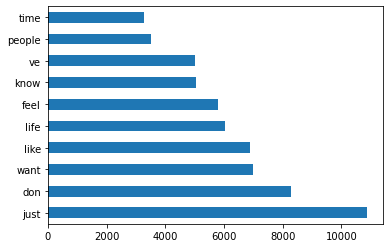

In [138]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
Xcv_train_df = pd.DataFrame(Xcvec_train.todense(), 
                          columns=cvec3.get_feature_names_out())

# Xcv_train
Xcv_train_df.head()

# print(type(Xcv_train))
# print(Xcv_train[0])

# cvec.get_feature_names()[:10]

# plot top occuring words
Xcv_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

Really tricky to remove convert 've' and 'don' into their full non-contraction form through Regex...will try adding as custom stop words. Will also add 'like'

In [139]:
custom_stopwords = ['ve', 'don', 'like', 'herself', 'next', 'too', 'neither', 'into', 'whereas', 'yet', 'every', 'everywhere', 'serious', 'forty', 'around', 'were', 'alone', 'hereafter', 'whenever', 'had', 'as', 'many', 'have', 'whoever', 'anyone', 'find', 'who', 'are', 'must', 'again', 'sometimes', 'why', 'go', 'ltd', 'will', 'made', 'someone', 'becoming', 'any', 'another', 'con', 'his', 'without', 'throughout', 'nor', 'through', 'eleven', 'indeed', 'after', 'besides', 'has', 'he', 'where', 'hereupon', 'keep', 'mostly', 'became', 'own', 'other', 'towards', 'whither', 'well', 'thence', 'these', 'while', 'your', 'always', 'from', 'very', 'sincere', 'therefore', 'hence', 'because', 'cant', 'do', 'of', 'somewhere', 'along', 'that', 'upon', 'toward', 'an', 'am', 'together', 'and', 'below', 'due', 'ever', 'above', 'namely', 'hundred', 'their', 'hers', 'then', 'per', 'yourself', 'whereby', 'via', 'no', 'most', 'whose', 'somehow', 'can', 'bill', 'de', 'anyhow', 'noone', 'also', 'amoungst', 'over', 'some', 'there', 'becomes', 'beyond', 'bottom', 'eight', 'during', 'something', 'please', 'couldnt', 'never', 'several', 'would', 'yours', 'being', 'seems', 'but', 'nothing', 'since', 'up', 'ie', 'him', 'third', 'put', 'anywhere', 'mine', 'ourselves', 'enough', 'seeming', 'formerly', 'than', 'those', 'ours', 'thus', 'only', 'top', 'so', 'cry', 'fill', 'side', 'among', 'sixty', 'out', 'thereby', 'whatever', 'on', 'been', 'describe', 'to', 'whereupon', 'should', 'move', 'etc', 'beside', 'inc', 'least', 'them', 'with', 'three', 'across', 'few', 'may', 'part', 'back', 'against', 'elsewhere', 'except', 'himself', 'or', 'first', 'thereafter', 'often', 'fifty', 'which', 'found', 'already', 'six', 'about', 'myself', 'mill', 'call', 'me', 'be', 'amongst', 'almost', 'until', 'still', 'for', 'otherwise', 'twelve', 'moreover', 'become', 'anything', 'my', 'four', 'might', 'show', 'system', 'thin', 'perhaps', 'afterwards', 'cannot', 'whereafter', 'thereupon', 'once', 'before', 'all', 'she', 'hasnt', 'twenty', 'wherein', 'front', 'therein', 'us', 'none', 'although', 'by', 'whom', 'her', 'hereby', 'amount', 'rather', 'yourselves', 'we', 'nevertheless', 'you', 'more', 'the', 'could', 'eg', 'latterly', 'when', 'they', 'even', 'itself', 'name', 'anyway', 'full', 'though', 'get', 'give', 'between', 'behind', 'sometime', 'themselves', 'seemed', 'one', 'down', 'its', 'else', 'detail', 'however', 'what', 'i', 'herein', 're', 'fifteen', 'see', 'wherever', 'how', 'nowhere', 'now', 'it', 'five', 'whence', 'under', 'not', 'meanwhile', 'off', 'take', 'onto', 'same', 'empty', 'such', 'everything', 'further', 'at', 'our', 'this', 'beforehand', 'ten', 'whether', 'two', 'seem', 'in', 'last', 'done', 'within', 'whole', 'both', 'former', 'un', 'co', 'fire', 'if', 'thick', 'much', 'thru', 'here', 'a', 'less', 'each', 'others', 'nine', 'interest', 'is', 'was', 'everyone', 'either', 'nobody', 'latter' ]

In [140]:
cvec4 = CountVectorizer(stop_words = custom_stopwords, max_features = 2_000, max_df = .98, ngram_range=(1,2))

In [141]:
Xcvec_train = cvec4.fit_transform(X_train)
Xcvec_test = cvec4.transform(X_test)

In [142]:
Xcvec_train.shape

(9323, 2000)

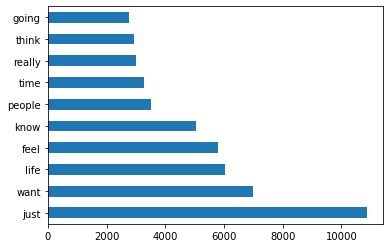

In [143]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
Xcv_train_df = pd.DataFrame(Xcvec_train.todense(), 
                          columns=cvec4.get_feature_names_out())

# Xcv_train
Xcv_train_df.head()

# print(type(Xcv_train))
# print(Xcv_train[0])

# cvec.get_feature_names()[:10]

# plot top occuring words
Xcv_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [144]:
suic_df = suic[['Post1', 'subreddit']]

In [145]:
suic_df.head()

,Post1,subreddit
0,attempted yesterday i had an exit yesterday an...,suicidewatch
1,my bf of years just tried to hang himself las...,suicidewatch
2,he gave up because of me we have shared many ...,suicidewatch
3,running out of options does anyone have any co...,suicidewatch
4,my life is shit i feel like shit i hate mysel...,suicidewatch


In [146]:
corpus = list(suic_df['Post1'])

In [147]:
corpus[:10]

['attempted yesterday i had an exit yesterday and i went for it unfortunately there was some noise involved and a neighbor found me now i m under supervision at home i know they leave on wednesday and i have everything ready for another attempt a silent one this time at another location   i don t want to follow through but i don t know how else i can end my pain i have suffered enough and i m confident i found a painless and safe method it even leaves a pretty corpse for my family to bury',
 'my bf of  years just tried to hang himself last night can someone give me some advice as to how i can make him feel better ',
 'he gave up because of me  we have shared many great memories but the emotional turmoil was too much for me to endure and i had to let him go however he has made it clear he can t live without me and i will forever blame myself for that i love you so much but i wish more than anything that we had never met at least not when we did i don t think i can keep going with the kn

In [148]:
sia = SentimentIntensityAnalyzer()

In [149]:
sia.polarity_scores(corpus[0])

{'neg': 0.163, 'neu': 0.658, 'pos': 0.178, 'compound': 0.1406}

In [151]:
sentiment = []

for posts in corpus:
    scores = sia.polarity_scores(posts)
    scores['Post1'] = posts
    sentiment.append(scores)

df = pd.DataFrame(sentiment)
df.head()

,neg,neu,pos,compound,Post1
0,0.163,0.658,0.178,0.1406,attempted yesterday i had an exit yesterday an...
1,0.000,0.892,0.108,0.4404,my bf of years just tried to hang himself las...
2,0.141,0.665,0.194,0.8683,he gave up because of me we have shared many ...
3,0.045,0.873,0.081,0.2960,running out of options does anyone have any co...
4,0.299,0.588,0.113,-0.9927,my life is shit i feel like shit i hate mysel...


In [152]:
df.tail()

,neg,neu,pos,compound,Post1
13910,0.072,0.842,0.086,0.0510,birthday bash wuhoo i m gonna be soon and i k...
13911,0.274,0.566,0.160,-0.7072,i feel like everyone hates me i feel so unwant...
13912,0.067,0.753,0.180,0.8125,im so desperate for love i let men treat me li...
13913,0.338,0.617,0.045,-0.9900,dumb girl that can t even take her own life i ...
13914,0.123,0.753,0.125,-0.4665,covid ruined my life i first tries to kill mys...


In [153]:
tvec = TfidfVectorizer(stop_words = 'english')

/Users/PreethiPanyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


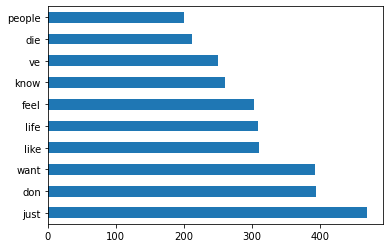

In [154]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [155]:
tvec = TfidfVectorizer(stop_words = custom_stopwords)

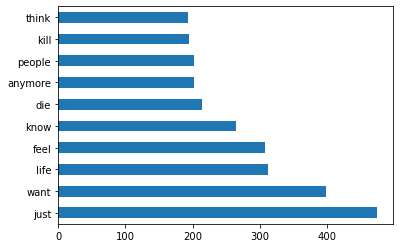

In [156]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [159]:
from statistics import mean

In [160]:
mean(df['compound'])

-0.33880817822493714

In [161]:
max(df['compound'])

1.0

In [162]:
min(df['compound'])

-0.9999

In [163]:
print(df[df['compound'] == df['compound'].max()])

        neg    neu    pos  compound  \
3021  0.035  0.313  0.652       1.0   
3977  0.000  0.003  0.997       1.0   

                                                  Post1  
3021  all hope is lost i go to school every day thin...  
3977  my life is in shambles  ha ha ha ha ha ha ha h...  


In [164]:
print(df[df['compound'] == df['compound'].min()])

         neg    neu    pos  compound  \
4839   0.323  0.605  0.073   -0.9999   
10030  0.701  0.299  0.000   -0.9999   

                                                   Post1  
4839   why suicide is not an option i think  what do ...  
10030  i will kill myself i will kill myself i will k...  


In [176]:
df['compound'].value_counts(bins = 10)

(-1.003, -0.8]    5468
(-0.8, -0.6]      1528
(0.8, 1.0]        1305
(-0.2, 5e-05]     1275
(-0.6, -0.4]      1112
(0.4, 0.6]         757
(0.6, 0.8]         736
(-0.4, -0.2]       670
(0.2, 0.4]         593
(5e-05, 0.2]       471
Name: compound, dtype: int64

In [172]:
df['Class'] = 'SuicidalThoughts'

In [179]:
df = df.rename(columns = {'Post1':'Post'})

In [180]:
df.head()

,neg,neu,pos,compound,Post,Class
0,0.163,0.658,0.178,0.1406,attempted yesterday i had an exit yesterday an...,SuicidalThoughts
1,0.000,0.892,0.108,0.4404,my bf of years just tried to hang himself las...,SuicidalThoughts
2,0.141,0.665,0.194,0.8683,he gave up because of me we have shared many ...,SuicidalThoughts
3,0.045,0.873,0.081,0.2960,running out of options does anyone have any co...,SuicidalThoughts
4,0.299,0.588,0.113,-0.9927,my life is shit i feel like shit i hate mysel...,SuicidalThoughts


In [181]:
suic_senti = df.to_csv('../project 1/suic_senti.csv', index = False)  